Here we are going to analyse the different results for prior distributions collected. 

In [98]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [99]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

In [100]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats

from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [101]:
priAccuracyHists = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/priAccuracyHists.csv')
priAccuracyHists

,prior,trainAccHistory,valAccHistory
0,custom_multivariate_normal_fn,"[0.1376301646232605, 0.21207430958747864, 0.25...","[0.1166032925248146, 0.10899873077869415, 0.10..."
1,custom_multivariate_cauchy_fn,"[0.14114832878112793, 0.20531944930553436, 0.2...","[0.13941697776317596, 0.09885931760072708, 0.0..."
2,custom_multivariate_expGamma_fn,"[0.11989867687225342, 0.19321699440479279, 0.2...","[0.07604562491178513, 0.045627377927303314, 0...."
3,custom_multivariate_johnsonSU3_fn,"[0.05009850859642029, 0.12172811478376389, 0.2...","[0.06970848888158798, 0.1318124234676361, 0.12..."
4,custom_multivariate_johnsonSU2_fn,"[0.17703349888324738, 0.22361384332180023, 0.2...","[0.13307984173297882, 0.10519645363092422, 0.1..."
5,custom_multivariate_johnsonSU1_fn,"[0.11666197329759598, 0.1868843287229538, 0.22...","[0.12040557712316513, 0.14195184409618378, 0.1..."
6,custom_multivariate_johnsonSUhalf_fn,"[0.12946805357933044, 0.19518716633319855, 0.2...","[0.1153358668088913, 0.10899873077869415, 0.09..."
7,custom_multivariate_johnsonSUtenth_fn,"[0.15043625235557556, 0.1929355412721634, 0.22...","[0.1305449903011322, 0.1318124234676361, 0.130..."
8,custom_multivariate_laplaceHalf_fn,"[0.11145510524511337, 0.19335772097110748, 0.2...","[0.1305449903011322, 0.10266159474849701, 0.10..."
9,custom_multivariate_laplace_fn,"[0.1916690170764923, 0.22727273404598236, 0.25...","[0.12801013886928558, 0.10773130506277084, 0.1..."


In [102]:
allPriors = [i for i in priAccuracyHists["prior"]]
allTrainAccs = np.array([[float(j) for j in i[1:-1].split(",")] for i in priAccuracyHists["trainAccHistory"]]) #Do this to convert from string to list of floats
allValAccs = np.array([[float(j) for j in i[1:-1].split(",")] for i in priAccuracyHists["valAccHistory"]]) #Do this to convert from string to list of floats

In [103]:
goodPriorsVal = [i[1] for i in sorted(zip(np.mean(allValAccs[:, -10:], axis=1), allPriors), reverse=True)[:4]] #Pick the best according to val acc (average of last 10)
goodPriorsTrain = [i[1] for i in sorted(zip(np.mean(allTrainAccs[:, -10:], axis=1), allPriors), reverse=True)[:4]] #Pick the best according to train acc (average of last 10)

In [104]:
sorted(zip(np.mean(allTrainAccs[:, -10:], axis=1), allPriors), reverse=True)
orderedOnValAcc = sorted(zip(np.mean(allValAccs[:, -10:], axis=1), allPriors), reverse=True)

valAccDict = {}
for n, pri in enumerate(allPriors):  
  valAccDict[pri] = np.mean(allValAccs[n, -10:])

trainAccDict = {}
for n, pri in enumerate(allPriors):  
  trainAccDict[pri] = np.mean(allTrainAccs[n, -10:])

trainAccDict #These are used to fill the table in the "Prior Distributions" section
valAccDict

accDict = {}
for n, pri in enumerate(allPriors):  
  accDict[pri] = (np.mean(allTrainAccs[n, -10:]), np.mean(allValAccs[n, -10:]))
accDict

{'custom_multivariate_cauchy_fn': (0.7131156682968139, 0.43941698372364046),
 'custom_multivariate_expGamma_fn': (0.7145932972431183, 0.4685678035020828),
 'custom_multivariate_johnsonSU1_fn': (0.7048409819602967, 0.4353612095117569),
 'custom_multivariate_johnsonSU2_fn': (0.6843231201171875, 0.3727503180503845),
 'custom_multivariate_johnsonSU3_fn': (0.6432873666286468, 0.2930291503667831),
 'custom_multivariate_johnsonSUhalf_fn': (0.7190402388572693,
  0.4583016514778137),
 'custom_multivariate_johnsonSUtenth_fn': (0.7207711815834046,
  0.4508238285779953),
 'custom_multivariate_laplace2_fn': (0.6875598132610321, 0.3912547528743744),
 'custom_multivariate_laplaceHalf_fn': (0.5865465819835662,
  0.23460075855255128),
 'custom_multivariate_laplace_fn': (0.6542499244213105, 0.32243345975875853),
 'custom_multivariate_logistic_fn': (0.7090768337249755, 0.376299113035202),
 'custom_multivariate_normal_fn': (0.7253729343414307, 0.43396704494953153),
 'custom_multivariate_scaleMixNormalCauc

In [105]:
orderedOnValAcc
johnsonSuPriors = [i for i in allPriors if "johnson" in i]
orderedOnValAcc

[(0.4685678035020828, 'custom_multivariate_expGamma_fn'),
 (0.4633713573217392, 'custom_multivariate_scaleMixNormal_fn'),
 (0.4583016514778137, 'custom_multivariate_johnsonSUhalf_fn'),
 (0.4508238285779953, 'custom_multivariate_johnsonSUtenth_fn'),
 (0.44081115126609804, 'custom_multivariate_weibull10_fn'),
 (0.43941698372364046, 'custom_multivariate_cauchy_fn'),
 (0.4353612095117569, 'custom_multivariate_johnsonSU1_fn'),
 (0.43396704494953153, 'custom_multivariate_normal_fn'),
 (0.3912547528743744, 'custom_multivariate_laplace2_fn'),
 (0.38390367925167085, 'custom_multivariate_weibull5_fn'),
 (0.376299113035202, 'custom_multivariate_logistic_fn'),
 (0.3727503180503845, 'custom_multivariate_johnsonSU2_fn'),
 (0.32243345975875853, 'custom_multivariate_laplace_fn'),
 (0.2930291503667831, 'custom_multivariate_johnsonSU3_fn'),
 (0.23460075855255128, 'custom_multivariate_laplaceHalf_fn'),
 (0.21977186501026152, 'custom_multivariate_weibull1_fn'),
 (0.11951837763190269, 'custom_multivariate_

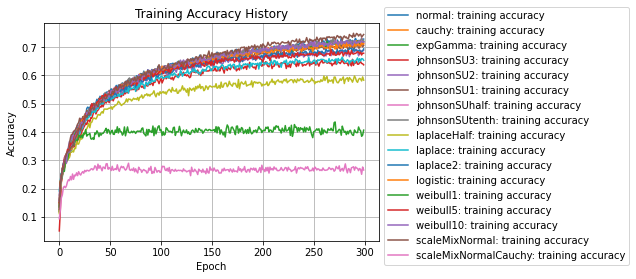

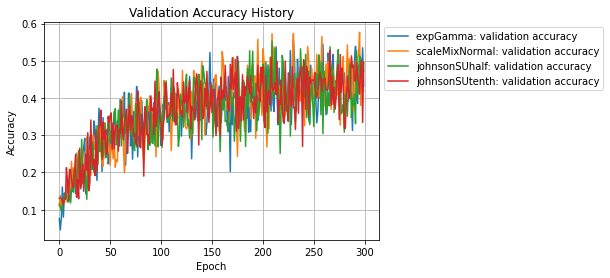

In [106]:
def graphTrainAcc(priorStr, x_y_lims=None):
  #This takes the prior name as its input and graphs training acc vs epoch
  if not type(priorStr)==list:
    trainFloatAccs = []
    for i in priAccuracyHists.loc[priAccuracyHists["prior"]==priorStr]["trainAccHistory"].iloc[0][1:-1].split(","):
      trainFloatAccs.append(float(i))

    plt.plot(np.arange(300), trainFloatAccs, label=priorStr.split("_")[-2]+": training accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show();
  else:
    for pri in priorStr:
      trainFloatAccs = []
      for i in priAccuracyHists.loc[priAccuracyHists["prior"]==pri]["trainAccHistory"].iloc[0][1:-1].split(","):
        trainFloatAccs.append(float(i))
      plt.plot(np.arange(300), trainFloatAccs, label=pri.split("_")[-2]+": training accuracy")    

    if not x_y_lims == None:
      plt.xlim(x_y_lims[0], x_y_lims[1])
      plt.ylim(x_y_lims[2], x_y_lims[3])

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.6, 0.5, 0.5))
    plt.grid()
    #plt.axis([150, 300, 0.66, 0.75])
    plt.show();

def graphValAcc(priorStr, x_y_lims=None):
  #This takes the prior name as its input and graphs validation acc vs epoch
  if not type(priorStr)==list:
    valFloatAccs = []
    for i in priAccuracyHists.loc[priAccuracyHists["prior"]==priorStr]["valAccHistory"].iloc[0][1:-1].split(","):
      valFloatAccs.append(float(i))

    plt.plot(np.arange(300), valFloatAccs, label=priorStr.split("_")[-2] + ": validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show();
  else:
    for pri in priorStr:
      valFloatAccs = []
      for i in priAccuracyHists.loc[priAccuracyHists["prior"]==pri]["valAccHistory"].iloc[0][1:-1].split(","):
        valFloatAccs.append(float(i))

      plt.plot(np.arange(300), valFloatAccs, label=pri.split("_")[-2] + ": validation accuracy")
    
    if not x_y_lims == None:
      plt.xlim(x_y_lims[0], x_y_lims[1])
      plt.ylim(x_y_lims[2], x_y_lims[3])

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Validation Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.grid()
    plt.show();

#graphTrainAcc(allPriors, x_y_lims=(200, 300, 0.7, 0.75));
graphTrainAcc(allPriors)
graphValAcc(goodPriorsVal)

We will graph these distributions as they were used in the tests to get an idea of their multivariate shape

In [107]:
distNormal = tfd.Normal(loc = 0, scale = 1)
distCauchy = tfd.Cauchy(loc = 0, scale = 1)
distExpGamm = tfd.ExpGamma(1, rate = 1)
distJohnsonSU3 = tfd.JohnsonSU(0, 3, 0, 1)
distJohnsonSU2 = tfd.JohnsonSU(0, 2, 0, 1)
distJohnsonSU1 = tfd.JohnsonSU(0, 1, 0, 1)
distJohnsonSUhalf = tfd.JohnsonSU(0, 1/2, 0, 1)
distJohnsonSUtenth = tfd.JohnsonSU(0, 1/10, 0, 1)

distLaplaceHalf = tfd.Laplace(loc = 0, scale = 0.5)
distLaplace = tfd.Laplace(loc = 0, scale = 1)
distLaplace2 = tfd.Laplace(loc = 0, scale = 2)

distLogistic = tfd.Logistic(loc = 0, scale=0.5)
distWeibull1 = tfd.Weibull(1, scale = 1)
distWeibull5 = tfd.Weibull(1, scale = 5)
distWeibull10 = tfd.Weibull(1, scale = 10)

distScaleMixNormal = tfd.Mixture(tfd.Categorical(probs=[0.5, 1.-0.5]), 
                                 [tfd.Normal(0, np.e**3), 
                                             tfd.Normal(0, np.e**-7)])

distScaleMixNormalCauchy = tfd.Mixture(tfd.Categorical(probs=[0.75, 1.-0.75]), 
                                 [tfd.Normal(0, np.e**1), 
                                             tfd.Cauchy(0, np.e**-3)])

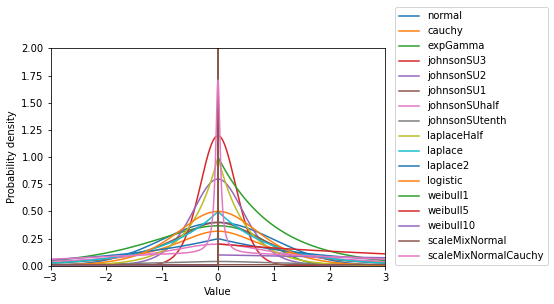

In [108]:
# Univariate density functions

import seaborn as sns

distList = [distNormal, distCauchy, distExpGamm, distJohnsonSU3, distJohnsonSU2, distJohnsonSU1, distJohnsonSUhalf,distJohnsonSUtenth,
            distLaplaceHalf, distLaplace, distLaplace2, distLogistic, distWeibull1, distWeibull5, distWeibull10, distScaleMixNormal,distScaleMixNormalCauchy]

distNames = [priorStr.split("_")[-2] for priorStr in allPriors[-2:]]
distNames = [priorStr.split("_")[-2] for priorStr in allPriors]

t = np.linspace(-8, 8, 10000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name)

plt.axis([-3, 3, 0, 2])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(1, -0.02, 0.5, 0.5))
plt.show()

Plot the four best at test time

Next let's look at results on the test set.

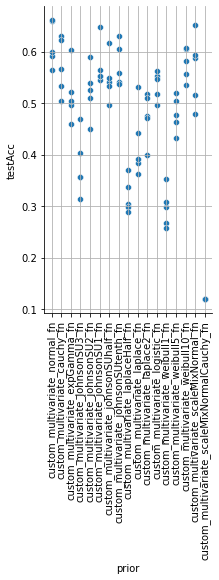

In [115]:
priTestAccs = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/priTestAccuracies.csv')
priorPlot = sns.relplot(data=priTestAccs, x="prior", y="testAcc", );
priorPlot.set_xticklabels(rotation=90)
plt.grid()

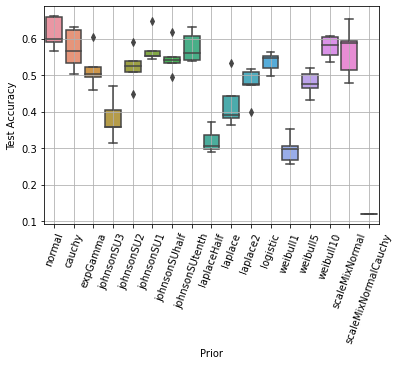

In [116]:
priTestAccs = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/priTestAccuracies.csv')
priorBoxPlot = sns.boxplot(data=priTestAccs.rename(columns={"prior":"Prior", "testAcc":"Test Accuracy"}), x="Prior", y="Test Accuracy", )
priorBoxPlot.set_xticklabels([i.split("_")[-2] for i in priAccuracyHists["prior"]], 
                          rotation=70);
plt.grid()


In [117]:
dfPriorMedTestAccs = priTestAccs.groupby("prior").median().sort_values(by=['testAcc'])
dfPriorMedTestAccs.loc["custom_multivariate_johnsonSUtenth_fn"][0]


0.5591397849462365

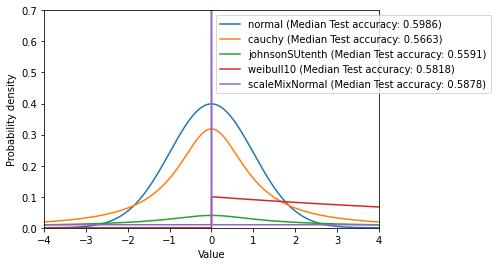

In [118]:
distList = [distNormal, distCauchy, distJohnsonSUtenth, distWeibull10, distScaleMixNormal]

distNames = ['normal', 'cauchy', 'johnsonSUtenth', 'weibull10', 'scaleMixNormal']

t = np.linspace(-4, 4, 10000) #Ensure this big enough to capture spike.
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Median Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))

plt.axis([-4, 4, 0, 0.7])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))

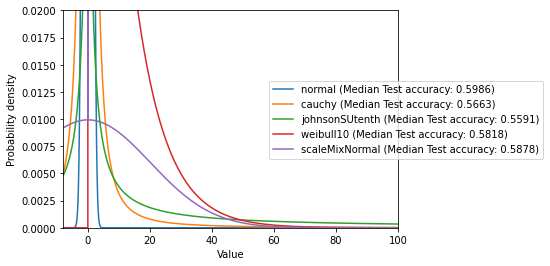

In [119]:
t = np.linspace(-8, 100, 10000) #Ensure this big enough to capture spike.
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Median Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))
  
plt.axis([-8, 100, 0, 0.02])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.6, 0.2, 0.5, 0.5))

plt.show();

In [130]:
distScaleMixNormal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=218.75655>

Display cauchy normal mix and normal normal mix

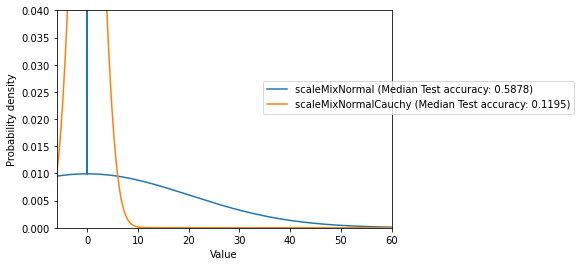

In [121]:
distList = [distScaleMixNormal, distScaleMixNormalCauchy]

distNames = ['scaleMixNormal', 'scaleMixNormalCauchy']

t = np.linspace(-8, 60, 10000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Median Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))

plt.axis([-6, 60, 0, 0.04])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.6, 0.2, 0.5, 0.5))
plt.show()

Let's look at the worst 5 now.


In [122]:
dfPriorMedTestAccs

,testAcc
prior,
custom_multivariate_scaleMixNormalCauchy_fn,0.119474
custom_multivariate_weibull1_fn,0.297491
custom_multivariate_laplaceHalf_fn,0.304659
custom_multivariate_johnsonSU3_fn,0.357228
custom_multivariate_laplace_fn,0.391876
custom_multivariate_laplace2_fn,0.474313
custom_multivariate_weibull5_fn,0.476703
custom_multivariate_expGamma_fn,0.504182
custom_multivariate_johnsonSU2_fn,0.524492


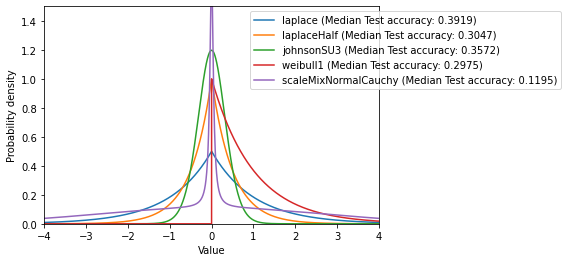

In [131]:
distList = [distLaplace, distLaplaceHalf, distJohnsonSU3, distWeibull1, distScaleMixNormalCauchy]

distNames = ['laplace', 'laplaceHalf', 'johnsonSU3', 'weibull1', 'scaleMixNormalCauchy']

t = np.linspace(-4, 4, 10000) #Ensure this big enough to capture spike.
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Median Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))

plt.axis([-4, 4, 0, 1.5])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.6, 0.5, 0.5, 0.5))

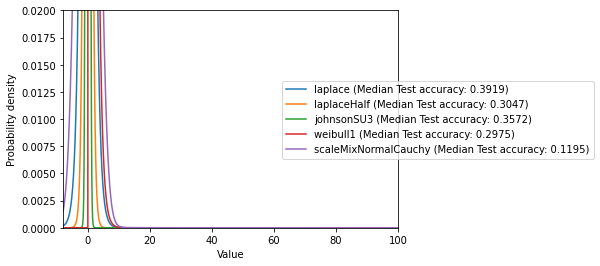

In [139]:
t = np.linspace(-8, 100, 10000) #Ensure this big enough to capture spike.
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Median Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))

plt.axis([-8, 100, 0, 0.02])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(1.1, 0.2, 0.5, 0.5))

plt.show();

Next let's plot just the johnsonSU dists

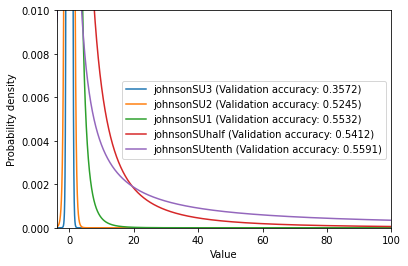

In [145]:
distList = [distJohnsonSU3, distJohnsonSU2, distJohnsonSU1, distJohnsonSUhalf,distJohnsonSUtenth]
distNames = ['johnsonSU3', 'johnsonSU2', 'johnsonSU1', 'johnsonSUhalf', 'johnsonSUtenth']

t = np.linspace(-4, 100, 10000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Validation accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))

plt.axis([-4, 100, 0, 0.01])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.5, 0.2, 0.5, 0.5))
plt.show()

Same with Weibull

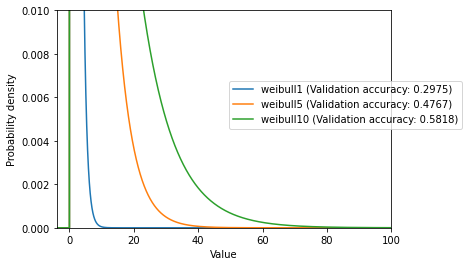

In [144]:
distList = [distWeibull1, distWeibull5, distWeibull10]
distNames = ["weibull1", "weibull5", "weibull10"]


t = np.linspace(-4, 100, 10000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Validation accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["custom_multivariate_"+name+"_fn"][0]))

plt.axis([-4, 100, 0, 0.01])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.5, 0.2, 0.5, 0.5))
plt.show()